In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
model = keras.models.load_model('./models/best_model')

In [5]:
from PIL import Image
from urllib import request
import cv2
from mtcnn.mtcnn import MTCNN

In [4]:
# # to open the image
# img = Image.open("./inserer_nom_du_fichier_ici.jpg")

# # for personal image
# img = np.asarray(img, dtype='uint8')
# plt.imshow(img)

In [8]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
# data_git for when on macbook
directory = "./data/new_full_lfw/"
val_directory = "./data/val_lfw/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0,
                                             seed = 42)
                                            #  seed = 42
validation_dataset = image_dataset_from_directory(val_directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0,
                                             seed = 42)
                                            #  seed = 42

Found 2424 files belonging to 11 classes.
Found 293 files belonging to 11 classes.


In [7]:
# results = model.predict(train_dataset)

In [6]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [7]:
# img.resize((224,224,3))
# img = np.expand_dims(img, axis = 0)
# face_pp = preprocess_input(img)

NameError: name 'img' is not defined

In [10]:
print(img.shape, face_pp.shape)

(1, 224, 224, 3) (1, 224, 224, 3)


In [11]:
results2 = model.predict(face_pp)

1/1 [==============================] - 1s 1s/step


In [15]:
print(results2)
print(validation_dataset.class_names)

[[ 1.1690785  -5.461881   -1.9359446   1.5321537   0.40572736  0.9882699
   0.12679048  0.34260908  1.5968635   2.5691097  -0.5283587  -5.1619964 ]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']


1/1 [==============================] - 0s 104ms/step
[[-1.0385427 -5.05612    1.0644199  7.2980905  2.016161   1.8380005
   0.5895462  0.6393967 -2.7443402 -4.271828  -3.195961  -1.1050977]]
3
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair']
Prediction:  George_W_Bush


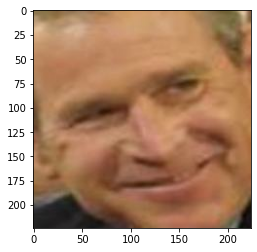

In [57]:
x = np.concatenate([x for x, y in validation_dataset.take(1)], axis=0)
image= validation_dataset.take(1)
for batch, _ in image:
    for test in batch:
        img = test.numpy().astype("uint8")
        plt.imshow(img)
        break

img.resize((224,224,3))
img = np.expand_dims(img, axis = 0)
face_pp = preprocess_input(img)
prediction = model.predict(img)
print(prediction)
maxIndex = prediction.argmax()
print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])
# print(image)
# plt.imshow(x[0].astype("uint8"))
# test = preprocess_input(x[0])


In [29]:
def make_prediction(url, validation_dataset = validation_dataset, top = 1):
    # open the url
    res = request.urlopen(url)
    # cast to an image
    img = np.asarray(bytearray(res.read()), dtype='uint8')
    # Add the color variable
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    # Add RGB readability
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.axis("off")
    plt.imshow(img)
    # setting a detector to specifically detect the face only part of the image
    detector = MTCNN()
    border_rel = 0 # increase or decrease zoom on image
    # detect faces in the image
    detections = detector.detect_faces(img)
    x1, y1, width, height = detections[0]['box']
    dw = round(width * border_rel)
    dh = round(height * border_rel)
    x2, y2 = x1 + width + dw, y1 + height + dh
    face = img[y1:y2, x1:x2]
    # resize pixels to the model size
    face = PIL.Image.fromarray(face)
    face = face.resize((224, 224))
    face = np.asarray(face)
    
    face.resize((224,224,3))
    face = np.expand_dims(face, axis = 0)
    # Make the prediction
    prediction = model.predict(face)
    # Get the biggest index of the image
    maxIndex = prediction.argmax()
    # print(maxIndex)
    class_names = validation_dataset.class_names
    print("Prediction: ", class_names[maxIndex], " - " + str(prediction[0][maxIndex]))
    

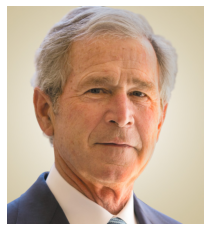

In [26]:
url = "https://www.speakersla.com/wp-content/uploads/2019/05/George-W-Bush-new.jpg"
res = request.urlopen(url)
# res = request.urlopen(yann_le_cun)
# res = request.urlopen(anastasia_volkova)
# res = request.urlopen(richard_dufour)

# Read the res object and convert it to an array
img = np.asarray(bytearray(res.read()), dtype='uint8')
# Add the color variable
img = cv2.imdecode(img, cv2.IMREAD_COLOR)

# Show the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img)

1/1 [==============================] - 0s 70ms/step


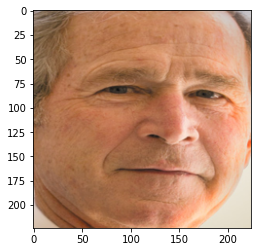

In [23]:
import PIL
# github source: https://github.com/ipazc/mtcnn
# Initialize mtcnn detector
detector = MTCNN()
border_rel = 0 # increase or decrease zoom on image
# detect faces in the image
detections = detector.detect_faces(img)
x1, y1, width, height = detections[0]['box']
dw = round(width * border_rel)
dh = round(height * border_rel)
x2, y2 = x1 + width + dw, y1 + height + dh
face = img[y1:y2, x1:x2]
# resize pixels to the model size
face = PIL.Image.fromarray(face)
face = face.resize((224, 224))
face = np.asarray(face)
# show face
plt.imshow(face)

In [24]:
face.resize((224,224,3))
face = np.expand_dims(face, axis = 0)
prediction = model.predict(face)
print(prediction)
maxIndex = prediction.argmax()
# print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])


1/1 [==============================] - 0s 25ms/step
[[-0.75310344  0.25080088 -1.3179525   4.6564784  -2.183006    0.27275595
   0.64916354 -0.63272506 -0.48933983  2.9449615  -3.3734567  -3.385051  ]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Tony_Blair', 'Vladimir_Putin']
Prediction:  George_W_Bush


In [25]:
# Without the MTCNN focus on the face
img.resize((224,224,3))
img = np.expand_dims(img, axis = 0)
prediction = model.predict(img)
print(prediction)
maxIndex = prediction.argmax()
# print(maxIndex)
class_names = validation_dataset.class_names
print(class_names)
print("Prediction: ", class_names[maxIndex])

1/1 [==============================] - 0s 23ms/step
[[ 4.632768  -4.893138   1.7854948 -2.264337   4.8818064 -1.7055548
  -0.3456353  1.4395999  2.3373797 -0.4288471 -2.8302903 -3.9336302]]
['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush', 'Gerhard_Schroeder', 'Hugo_Chavez', 'Jean_Chretien', 'John_Ashcroft', 'Junichiro_Koizumi', 'Tony_Blair', 'Vladimir_Putin']
Prediction:  Gerhard_Schroeder


In [4]:
classes = [13, 21, 24, 39, 57, 102, 781, 901, 5749]

losses = [0.0124, 0.0101, 0.0122, 0.3874, 0.4474, 0.5485, 0.6659, 1.0801, 2.168]
accuracies = [0.9985, 0.9996, 0.9985, 0.9028, 0.8938, 0.8926, 0.8784, 0.8358, 0.5972]
val_losses = [0.5243, 0.5934, 0.7153, 1.2016, 1.4219, 1.7738, 2.2368, 4.2022, 5.0758]
val_accuracies = [0.9114, 0.899, 0.872, 0.7052, 0.6586, 0.5843, 0.5099, 0.2727, 0.2057]
print(losses)
print(accuracies)
print(val_losses)
print(val_accuracies)

[0.0124, 0.0101, 0.0122, 0.3874, 0.4474, 0.5485, 0.6659, 1.0801, 2.168]
[0.9985, 0.9996, 0.9985, 0.9028, 0.8938, 0.8926, 0.8784, 0.8358, 0.5972]
[0.5243, 0.5934, 0.7153, 1.2016, 1.4219, 1.7738, 2.2368, 4.2022, 5.0758]
[0.9114, 0.899, 0.872, 0.7052, 0.6586, 0.5843, 0.5099, 0.2727, 0.2057]


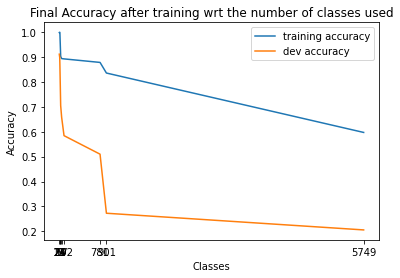

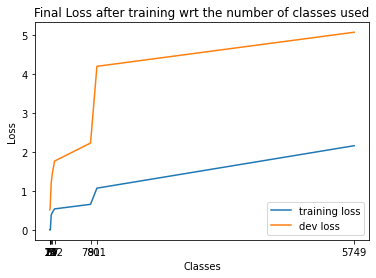

In [10]:
fig1, ax1 = plt.subplots()
plt.title("Final Accuracy after training wrt the number of classes used")
plt.ylabel("Accuracy")
plt.xlabel("Classes")
ax1.set_xticks(classes)
plt.plot(classes, accuracies)
plt.plot(classes, val_accuracies)
plt.legend(["training accuracy", "dev accuracy"], loc = "upper right")
plt.show()

fig2, ax2 = plt.subplots()
plt.title("Final Loss after training wrt the number of classes used")
plt.ylabel("Loss")
plt.xlabel("Classes")
ax2.set_xticks(classes)
plt.plot(classes, losses)
plt.plot(classes, val_losses)
plt.legend(["training loss", "dev loss"], loc = "lower right")
plt.show()

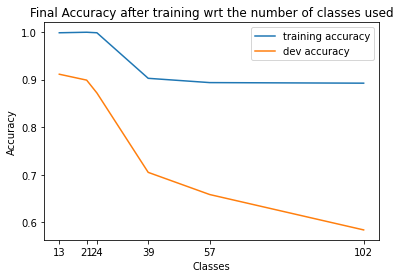

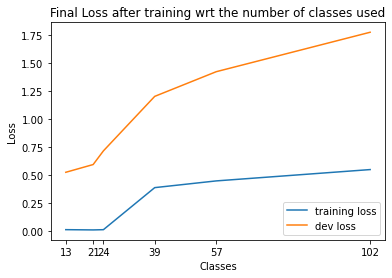

In [11]:
new_classes = [13, 21, 24, 39, 57, 102]
# opposite order so gotta reverse these
new_losses = [0.0124, 0.0101, 0.0122, 0.3874, 0.4474, 0.5485,]
new_accuracies = [0.9985, 0.9996, 0.9985, 0.9028, 0.8938, 0.8926]
new_val_losses = [0.5243, 0.5934, 0.7153, 1.2016, 1.4219, 1.7738]
new_val_accuracies = [0.9114, 0.899, 0.872, 0.7052, 0.6586, 0.5843]

fig1, ax1 = plt.subplots()
plt.title("Final Accuracy after training wrt the number of classes used")
plt.ylabel("Accuracy")
plt.xlabel("Classes")
ax1.set_xticks(new_classes)
plt.plot(new_classes, new_accuracies)
plt.plot(new_classes, new_val_accuracies)
plt.legend(["training accuracy", "dev accuracy"], loc = "upper right")
plt.show()


fig2, ax2 = plt.subplots()
plt.title("Final Loss after training wrt the number of classes used")
plt.ylabel("Loss")
plt.xlabel("Classes")
ax2.set_xticks(new_classes)
plt.plot(new_classes, new_losses)
plt.plot(new_classes, new_val_losses)
plt.legend(["training loss", "dev loss"], loc = "lower right")
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction:  George_W_Bush  - 4.6564784


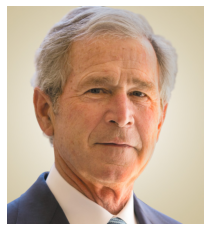

In [30]:
url_bush = "https://www.speakersla.com/wp-content/uploads/2019/05/George-W-Bush-new.jpg"
make_prediction(url_bush)
